In [366]:
##Test


In [1]:
#Import Libraries
import requests
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

In [2]:
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [3]:
#Pull factors and BTC price from Glassnode Api
API_KEY = "1rwUpyBLJnEo1qGTFlLuz1CgeTx"
vol = requests.get('https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
vol_df = pd.read_json(vol.text, convert_dates=['t'])

dorm = requests.get('https://api.glassnode.com/v1/metrics/indicators/average_dormancy',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
dormancy_df = pd.read_json(dorm.text, convert_dates=['t'])

# make API request
asopr = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr_adjusted',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
asopr_df = pd.read_json(asopr.text, convert_dates=['t'])
asopr_df.head()

# make API request
price_res = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_close',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
price_df = pd.read_json(price_res.text, convert_dates=['t'])

# make API request
exch_flow = requests.get('https://api.glassnode.com/v1/metrics/transactions/transfers_volume_exchanges_net',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
exch_df = pd.read_json(exch_flow.text, convert_dates=['t'])

# make API request
cdd = requests.get('https://api.glassnode.com/v1/metrics/indicators/cdd',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
cdd_df = pd.read_json(cdd.text, convert_dates=['t'])

# make API request
profit_relative = requests.get('https://api.glassnode.com/v1/metrics/supply/profit_relative',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
profit_relative_df = pd.read_json(profit_relative.text, convert_dates=['t'])


#convert to OHLCpandas dataframe
ohlc = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_ohlc',
                    params={'a': 'BTC', 'api_key': API_KEY})
j = ohlc.json()
ohlc_array=[]
for t in j:
    newdict={}
    newdict['t']=t['t']
    newdict['o']=t['o']['o']
    newdict['h']=t['o']['h']
    newdict['l']=t['o']['l']
    newdict['c']=t['o']['c']
    ohlc_array.append(newdict)
ohlc_df = pd.DataFrame(ohlc_array)
result = ohlc_df.to_json(orient="records")
ohlc_df = pd.read_json(result, convert_dates=['t'])




In [4]:
ohlc_df.rename(columns = {'t':'date', 'o':'open', 'h':'high', 'l':'low', 'c':'close'}, inplace=True)
ohlc_df.set_index('date', inplace=True)

In [5]:
vol_df.rename(columns = {'t':'date', 'v':'vol'}, inplace=True)
vol_df.set_index('date', inplace=True)


In [6]:
dormancy_df.rename(columns = {'t':'date', 'v':'dormancy'}, inplace=True)
dormancy_df.set_index('date', inplace=True)


In [7]:
asopr_df.rename(columns = {'t':'date', 'v':'asopr'}, inplace=True)
asopr_df.set_index('date', inplace=True)

In [8]:
price_df.rename(columns = {'t':'date', 'v':'price'}, inplace=True)
price_df.set_index('date', inplace=True)

In [9]:
exch_df.rename(columns = {'t':'date', 'v':'flow'}, inplace=True)
exch_df.set_index('date', inplace=True)

In [10]:
cdd_df.rename(columns = {'t':'date', 'v':'cdd'}, inplace=True)
cdd_df.set_index('date', inplace=True)

In [11]:
profit_relative_df.rename(columns = {'t':'date', 'v':'profit_relative_df'}, inplace=True)
profit_relative_df.set_index('date', inplace=True)

In [12]:
dataset = pd.concat([vol_df, dormancy_df, asopr_df, ohlc_df, exch_df, cdd_df,profit_relative_df], axis=1, join='inner')
# dataset = pd.concat([vol_df, ohlc_df], axis=1, join='inner')
# dataset['5Day']=dataset['price'].rolling(window=5).mean()
# dataset['25Day']=dataset['price'].rolling(window=25).mean()
# dataset['50Day']=dataset['price'].rolling(window=50).mean()
# dataset['5DayFloor']=dataset['price'].rolling(window=5).min()
# dataset['25DayFloor']=dataset['price'].rolling(window=25).min()
# dataset['50DayFloor']=dataset['price'].rolling(window=50).min()
# dataset['ewm'] = dataset['price'].ewm(com=.5).mean()
dataset

,vol,dormancy,asopr,open,high,low,close,flow,cdd,profit_relative_df
date,,,,,,,,,,
2011-08-17,3.230502e+05,2.860031,1.023796,10.943860,11.095782,10.686489,10.993067,0.007500,9.222607e+05,0.654183
2011-08-18,4.002768e+05,3.039587,1.018691,10.946207,11.030015,10.350000,10.847018,8.049029,1.214820e+06,0.633324
2011-08-19,5.561058e+05,1.548021,1.009232,10.869213,11.740022,10.802218,11.650000,39.591418,8.595439e+05,0.673411
2011-08-20,2.246163e+05,3.934542,1.026221,11.651622,11.656323,10.720000,11.450998,-8.048029,8.800028e+05,0.663196
2011-08-21,2.428926e+05,1.686685,0.993798,11.452000,11.499200,11.112000,11.323212,1.819000,4.080212e+05,0.658170
...,...,...,...,...,...,...,...,...,...,...
2021-05-06,1.808012e+06,14.409470,1.047412,57547.742395,58363.314618,55411.084285,56485.701297,-69.668496,8.048288e+06,0.907789
2021-05-07,1.939428e+06,32.867983,1.105494,56413.953551,58516.499418,55404.680358,57369.557999,-9522.714410,2.461146e+07,0.925951
2021-05-08,1.376119e+06,15.760862,1.043171,57352.765953,59454.684237,57061.019638,58766.584875,4655.226832,6.680947e+06,0.959921


In [13]:
dataset.dropna(inplace=True)

In [14]:
dataset.shape

(3555, 10)

In [15]:
dataset = dataset['2015-01-01':]
dataset.head()

,vol,dormancy,asopr,open,high,low,close,flow,cdd,profit_relative_df
date,,,,,,,,,,
2015-01-01,4.646205e+05,2.302504,0.987951,320.987415,320.987415,313.739880,314.025456,124.391488,9.468414e+05,0.454863
2015-01-02,7.280903e+05,2.879840,0.978582,313.973633,316.759759,312.847921,315.687161,790.763344,1.942400e+06,0.463323
2015-01-03,8.367299e+05,6.160422,0.923681,315.313701,316.529810,283.006535,283.006535,4634.540821,4.768928e+06,0.421309
2015-01-04,1.129690e+06,6.023914,0.915979,280.469412,288.253558,256.121596,263.807883,-897.057854,5.944678e+06,0.423702
2015-01-05,1.134569e+06,4.854263,0.901450,264.973697,279.195639,264.973697,276.800000,7898.518534,5.045935e+06,0.428064


In [16]:
# dataset['ewm'] = dataset['price'].ewm(com=.5).mean()
# dataset

In [17]:
def window_data(df, window, target_column, lag=0, target_as_feature=True):
    Xdf = df
    ydf = df[target_column]
    if target_as_feature == False:
        Xdf=Xdf.drop(columns=[target_column])
    X, y = [], []
    for i in range(len(Xdf)-window-lag):
        features = Xdf[i+lag:i+window+lag]
        X.append(features)
    for i in range(len(ydf)-window-lag):
        target = ydf[i+window+lag]
        y.append(target)
    return np.array(X), np.array(y).reshape(-1,1)
    
    
    

In [18]:
X, y = window_data(dataset, 20, "close", 0, True)

In [19]:
split = int(0.8 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [20]:
scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler()
    X_train[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 
for i in range(X_test.shape[1]):
    X_test[:, i, :] = scalers[i].transform(X_test[:, i, :])

In [21]:
X_test.shape

(461, 20, 10)

In [22]:
sc = MinMaxScaler()
sc.fit(y)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [32]:
#LSTM model
model = Sequential()
epochs =10
model.add(LSTM(100, return_sequences=True, bias_initializer='RandomNormal', input_shape=(X_train.shape[1],10)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
fit = model.fit(X_train, y_train, batch_size=1, epochs = epochs)

Epoch 1/12
1841/1841 [==============================] - 32s 15ms/step - loss: 0.0016
Epoch 2/12
1841/1841 [==============================] - 34s 18ms/step - loss: 5.6948e-04
Epoch 3/12
1841/1841 [==============================] - 33s 18ms/step - loss: 4.2519e-04
Epoch 4/12
1841/1841 [==============================] - 28s 15ms/step - loss: 3.9076e-04
Epoch 5/12
1841/1841 [==============================] - 28s 15ms/step - loss: 3.7037e-04
Epoch 6/12
1841/1841 [==============================] - 27s 15ms/step - loss: 2.8598e-04
Epoch 7/12
1841/1841 [==============================] - 30s 16ms/step - loss: 4.2496e-04
Epoch 8/12
1841/1841 [==============================] - 26s 14ms/step - loss: 2.2061e-04
Epoch 9/12
1841/1841 [==============================] - 26s 14ms/step - loss: 2.0992e-04
Epoch 10/12
1841/1841 [==============================] - 27s 14ms/step - loss: 2.3654e-04
Epoch 11/12
1841/1841 [==============================] - 28s 15ms/step - loss: 2.1359e-04
Epoch 12/12
1841/1841 [

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 20, 100)           44400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 20, 100)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 20, 50)            30200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 20, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)               

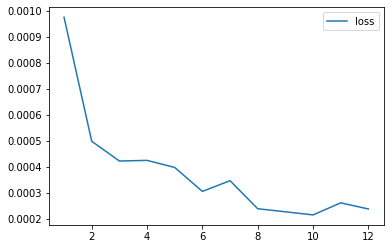

In [41]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(fit.history, index=range(1, len(fit.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

In [42]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 9ms/step - loss: 0.0065


0.0064686369150877

In [43]:
predicted = model.predict(X_test)
predicted.shape

(461, 1)

In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicted)
mse

0.006468637137212274

In [45]:
np.sqrt(mse)

0.08042783807371844

In [85]:
predicted_close = sc.inverse_transform(predicted)
actual_close = sc.inverse_transform(y_test.reshape(-1, 1))
# print(predicted_prices)

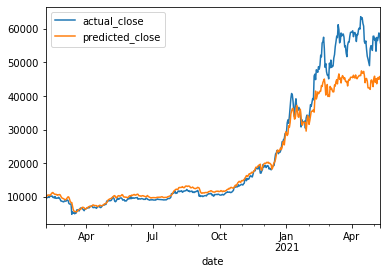

In [86]:
results_df = pd.DataFrame({
    "actual_close": actual_close.ravel(),
    "predicted_close": predicted_close.ravel()
    }, index = dataset.index[-len(real_prices): ])
results_df.plot()

In [87]:
results_df

,actual_close,predicted_close
date,,
2020-02-05,9613.424289,9761.876953
2020-02-06,9729.802231,10094.413086
2020-02-07,9790.333846,10355.452148
2020-02-08,9866.507244,10595.089844
2020-02-09,10119.124820,10595.291016
...,...,...
2021-05-06,56485.701297,45145.871094
2021-05-07,57369.557999,45536.406250
2021-05-08,58766.584875,44963.511719


In [158]:
results_prices_df = pd.concat([ohlc_df, results_df], axis=1, join='inner')
results_prices_df['predicted_perc_change'] = results_prices_df['predicted_close'].pct_change()
results_prices_df.dropna(inplace=True)
results_prices_df.reset_index(inplace=True)
results_prices_df.tail()




,date,open,high,low,close,actual_close,predicted_close,predicted_perc_change
455,2021-05-06,57547.742395,58363.314618,55411.084285,56485.701297,56485.701297,45145.871094,0.034285
456,2021-05-07,56413.953551,58516.499418,55404.680358,57369.557999,57369.557999,45536.406250,0.008651
457,2021-05-08,57352.765953,59454.684237,57061.019638,58766.584875,58766.584875,44963.511719,-0.012581
458,2021-05-09,58949.175691,59210.881789,56594.240801,58218.566077,58218.566077,45820.246094,0.019054
459,2021-05-10,58313.694230,59463.950585,54558.287582,55824.861667,55824.861667,45230.531250,-0.012870


In [161]:
position=0
realized_profit = 0
unrealized_profit = 0 
profitable_transactions=0
unprofitable_transactions=0
data_size = len(results_prices_df.index)

for index, value in results_prices_df.iterrows():
    if index<data_size-1:
        open_price = results_prices_df.iloc[index][1]
        close_price = results_prices_df.iloc[index][4]
        tmo_open_price = results_prices_df.iloc[index+1][1]
        tmo_close_price = results_prices_df.iloc[index+1][4]
        
        if position == 1:
            unrealized_profit = close_price - buy_price
        if value[7] > 0:
            if position == 0:
                buy_price = tmo_open_price
                position = 1
        if value[7] < 0:
            if position ==1:
                sell_price = tmo_open_price
                position = 0
                trans_profit = sell_price-buy_price
                unrealized_profit = 0 
                realized_profit += trans_profit
                if trans_profit>=0:
                    profitable_transactions+=1
                else:
                    unprofitable_transactions+=1

            
            
            
print(realized_profit)
print(unrealized_profit)
print(profitable_transactions)
print(unprofitable_transactions)

31179.676010867493
0
60
41
